In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import os, json
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

In [2]:
base_path = "../target/criterion/select/"

In [3]:
benches_list = []

for dir in os.listdir(base_path):
    if not os.path.isdir(base_path + dir):
        continue

    run_name = dir.split("_")
    data = {}
    
    # if int(run_name[0], 10) == 9 or int(run_name[0], 10) == 11 or int(run_name[1], 10) == 2:
    #     continue
    
    data["inv"] = int(run_name[0], 10)
    data["sub"] = int(run_name[1], 10)
    data["size"] = int(run_name[2], 10)
    data["dense"] = float(run_name[3])
    data["rep"] = int(run_name[4], 10)
    
    # get the path of the file
    path = base_path + dir + "/new/estimates.json"
    with open(path, "r") as f:
        estimates = json.load(f)
        data["mean"] = estimates["mean"]["point_estimate"]
    
    benches_list.append(data)
    
benches_df = pd.DataFrame(benches_list).sort_values(by="size", ignore_index=True)

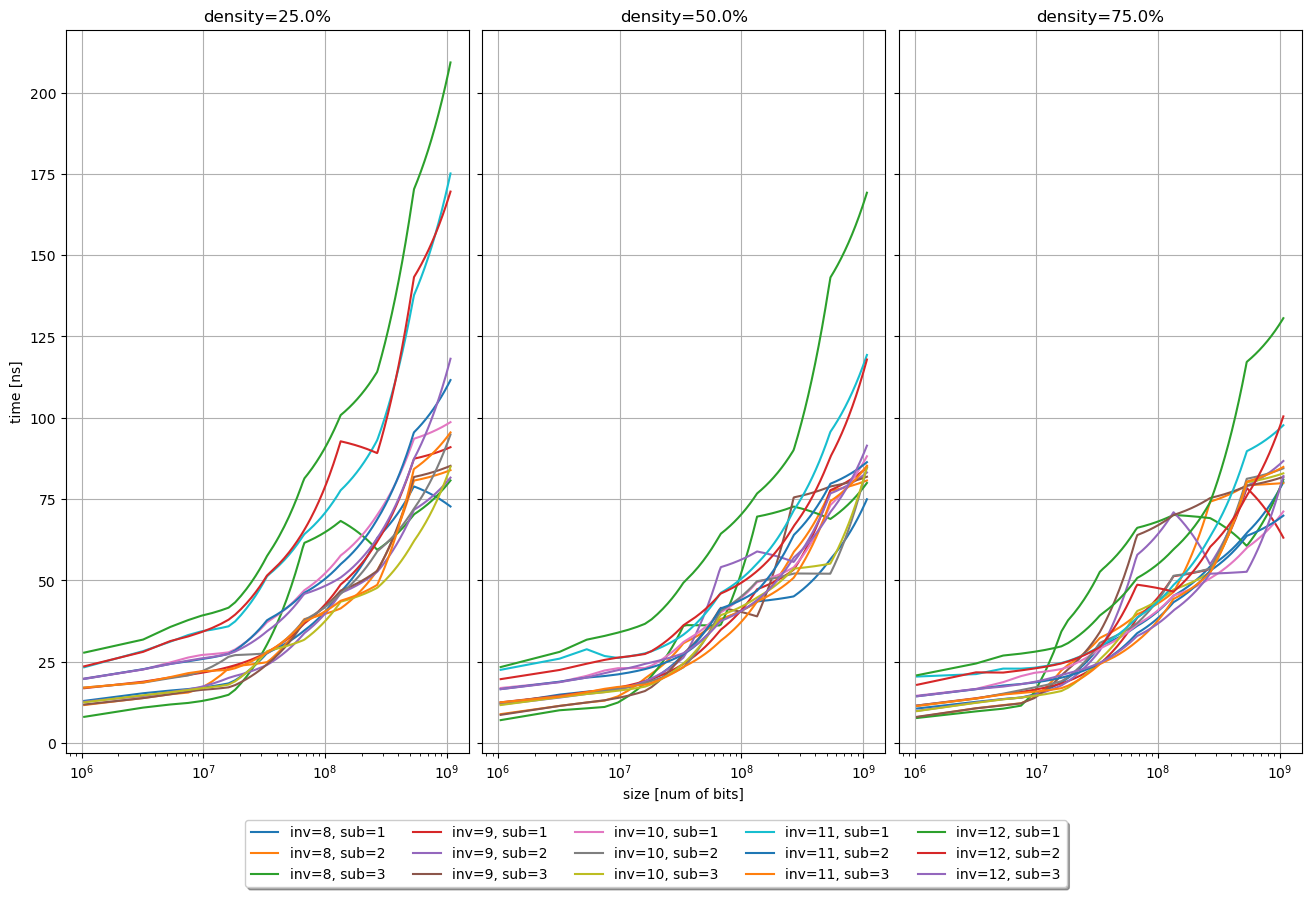

In [5]:
num_of_densities = len(benches_df["dense"].unique())
fig, ax = plt.subplots(1, num_of_densities, constrained_layout=True, sharex=True, sharey=True, squeeze=False)
fig.set_size_inches(13, 8)
ax[0, 1].set_xlabel("size [num of bits]")
ax[0, 0].set_ylabel("time [ns]")

for i, (name, group) in enumerate(benches_df.groupby(["dense"])):
    for name1, group1 in group.groupby(["inv", "sub"]):
        interp = interp1d(group1["size"], group1["mean"], kind=1)
        X = np.linspace(group1["size"].min(), group1["size"].max(), 500)
        Y = interp(X)
        ax[0, i].plot(X, Y, label=f"inv={name1[0]}, sub={name1[1]}")
    
    ax[0, i].set_title(f"density={float(name[0])*100}%")
    ax[0, i].set_xscale("log")
    ax[0, i].grid(True)
    #ax[0, i].set_yscale("log")

handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.01), fancybox=True, shadow=True, ncol=5)

plt.show()